


# Project: Tmdb-movies Insights

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Welcome to this exploration of Tmdb dataset.
this dataset contains 10000 movie from year 1960 to year 2015. we will discover this data & will make the process needed (wrangling & cleaning) to answer some questions.
We will be answering :   
1- Which genres aremost popular fromyear to year?   
2- What kinds of properties are associated with movies that have high revenues?    
Also, we will explore conitribution of actors, directors & production companies in the most movies.    
Let's Start Exploring.  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# read file & take a look of columns
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# view dimensions of dataset
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# show statistics & edit some columns format to read it easily
df.describe().style.format({"budget_adj": "{:,.0f}", "revenue_adj": "{:,.0f}","budget": "{:,.0f}","revenue": "{:,.0f}"})

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866,10866,"10,866","10,866",10866,10866,10866,10866,"10,866","10,866"
mean,66064.2,0.646441,"14,625,701","39,823,320",102.071,217.39,5.97492,2001.32,"17,551,040","51,364,363"
std,92130.1,1.00018,"30,913,214","117,003,487",31.3814,575.619,0.935142,12.8129,"34,306,156","144,632,485"
min,5,6.5e-05,0,0,0,10,1.5,1960,0,0
25%,10596.2,0.207583,0,0,90,17,5.4,1995,0,0
50%,20669,0.383856,0,0,99,38,6,2006,0,0
75%,75610,0.713817,"15,000,000","24,000,000",111,145.75,6.6,2011,"20,853,251","33,697,096"
max,417859,32.9858,"425,000,000","2,781,505,847",900,9767,9.2,2015,"425,000,000","2,827,123,750"


#### Notes:
* 1-Revenue mean is 40 million while(min:0 & max:2.87 billion)
* 2-Budget  mean is 15 million while(min:0 & max:425 million)
* 3-Voting mean is 6 while(min:1.5 & max:9.2) "scale from 0 to 10"
* 4-Popularity mean is 0.6 while (min:6.5 & max:33) "very low mean, maybe there are outliers"



### Data Cleaning 

In [8]:
# drop columns from dataset
df.drop(['imdb_id', 'homepage', 'tagline','overview', 'release_date','budget_adj','revenue_adj','keywords'], axis=1, inplace=True)
# confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [9]:
# check for any duplicated rows
df.duplicated(subset = None, keep = 'first').sum()

1

In [10]:
# drop duplicated rows & check again should be Zero
df.drop_duplicates(inplace=True)
df.duplicated(subset = None, keep = 'first').sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.2+ MB


In [12]:
# view missing value count for each column in dataset
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [13]:
# drop rows with any null values in dataset
df.dropna(inplace=True)
# checks if any of columns in dataset have null values - should print False
df.isnull().sum().any()

False

In [14]:
# refine & split genres & production_copmanies by selecting first word:
# 1-make a copy from df
df1 = df.copy()
# 2-columns to split by "|"
split_columns = ['genres', 'production_companies','cast']

# 3-apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])

df1.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015


In [15]:
# add new column 'profit' to dataset
df1['profit'] = df1['revenue'] - df1['budget']
# reindex columns 
column_names = ["id", "original_title","cast", "production_companies","director","genres","popularity","runtime","vote_count","vote_average","release_year","budget","revenue","profit"]
df1 = df1.reindex(columns=column_names)
# check new colun existance
df1.head()

,id,original_title,cast,production_companies,director,genres,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,Jurassic World,Chris Pratt,Universal Studios,Colin Trevorrow,Action,32.985763,124,5562,6.5,2015,150000000,1513528810,1363528810
1,76341,Mad Max: Fury Road,Tom Hardy,Village Roadshow Pictures,George Miller,Action,28.419936,120,6185,7.1,2015,150000000,378436354,228436354
2,262500,Insurgent,Shailene Woodley,Summit Entertainment,Robert Schwentke,Adventure,13.112507,119,2480,6.3,2015,110000000,295238201,185238201
3,140607,Star Wars: The Force Awakens,Harrison Ford,Lucasfilm,J.J. Abrams,Action,11.173104,136,5292,7.5,2015,200000000,2068178225,1868178225
4,168259,Furious 7,Vin Diesel,Universal Pictures,James Wan,Action,9.335014,137,2947,7.3,2015,190000000,1506249360,1316249360


In [16]:
# add comma to separate thousands in budget, revenue & profit to read numbers easily
df1['budget'] = df1['budget'].apply('{:,}'.format)
df1['revenue'] = df1['revenue'].apply('{:,}'.format)
df1['profit'] = df1['profit'].apply('{:,}'.format)
# check df
df1.head()

,id,original_title,cast,production_companies,director,genres,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,Jurassic World,Chris Pratt,Universal Studios,Colin Trevorrow,Action,32.985763,124,5562,6.5,2015,"150,000,000","1,513,528,810","1,363,528,810"
1,76341,Mad Max: Fury Road,Tom Hardy,Village Roadshow Pictures,George Miller,Action,28.419936,120,6185,7.1,2015,"150,000,000","378,436,354","228,436,354"
2,262500,Insurgent,Shailene Woodley,Summit Entertainment,Robert Schwentke,Adventure,13.112507,119,2480,6.3,2015,"110,000,000","295,238,201","185,238,201"
3,140607,Star Wars: The Force Awakens,Harrison Ford,Lucasfilm,J.J. Abrams,Action,11.173104,136,5292,7.5,2015,"200,000,000","2,068,178,225","1,868,178,225"
4,168259,Furious 7,Vin Diesel,Universal Pictures,James Wan,Action,9.335014,137,2947,7.3,2015,"190,000,000","1,506,249,360","1,316,249,360"


In [17]:
# change budget, revenue & profit type from string to int
df1['budget']= df1['budget'].str.extract('(\d+)').astype(int)
df1['revenue']= df1['revenue'].str.extract('(\d+)').astype(int)
df1['profit']= df1['profit'].str.extract('(\d+)').astype(int)
# check types
df1.head()

,id,original_title,cast,production_companies,director,genres,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,Jurassic World,Chris Pratt,Universal Studios,Colin Trevorrow,Action,32.985763,124,5562,6.5,2015,150,1,1
1,76341,Mad Max: Fury Road,Tom Hardy,Village Roadshow Pictures,George Miller,Action,28.419936,120,6185,7.1,2015,150,378,228
2,262500,Insurgent,Shailene Woodley,Summit Entertainment,Robert Schwentke,Adventure,13.112507,119,2480,6.3,2015,110,295,185
3,140607,Star Wars: The Force Awakens,Harrison Ford,Lucasfilm,J.J. Abrams,Action,11.173104,136,5292,7.5,2015,200,2,1
4,168259,Furious 7,Vin Diesel,Universal Pictures,James Wan,Action,9.335014,137,2947,7.3,2015,190,1,1


#### Cleaning steps:
* 1-Drop unwanted columns. 
* 2-Remove duplicates.
* 3-Remove nulls.
* 4-Split names for production companies, director & cast.
* 5-Added new column 'profit' that we will need in exploration process.
* 6-Reordering columns to be more consistent & tidy.
* 7- Adding comma to separate thousands in budget, revenue & profit to read numbers easily.
* 8-Change type from string to int for budget, revenue & profit.
* 9-Saving cleaned df to a new one.

In [18]:
df1.to_csv('tmdb-movies-cleaned')

# <a id='eda'></a>
## Exploratory Data Analysis

> Now we are ready to explore, visualize & answering questions about dataset

### Which genres are most popular from year to year?

Text(0.5,1,'Movies by Genre, 1960-2015')

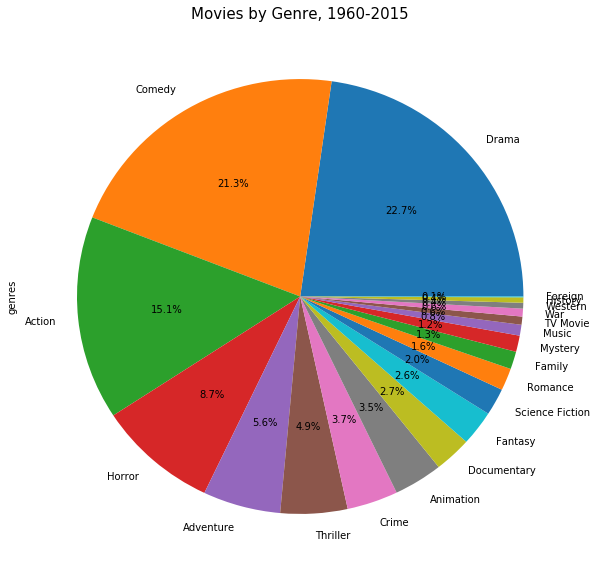

In [19]:
df1['genres'].value_counts().plot(kind='pie', figsize=(10,10),autopct='%1.1f%%')
plt.title('Movies by Genre, 1960-2015', size=15)


#### Conclusion:
* Drama, Comedy & Action genres are representing 60% from all movies from 1960 to 2015


### Do higher revenues gain higher profits? 


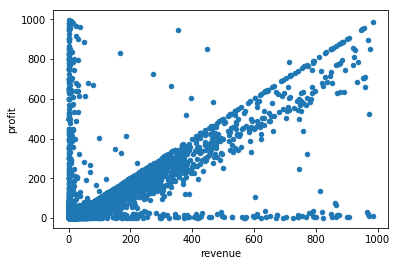

In [20]:
df1.plot(x='revenue', y='profit', kind='scatter');




* Plotting correlation between revenue & profit.

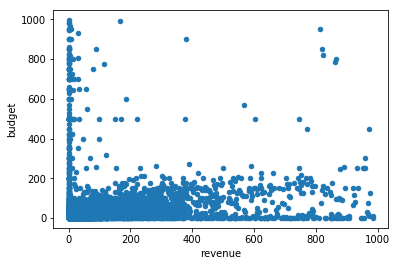

In [21]:
df1.plot(x='revenue', y='budget', kind='scatter');



* Plotting correlation between budget & revenue


#### Conclusion:

* There is a strong correlation between revenue & profit. in other word, Movies that have bigger revenues got bigger profits.
* However, the correlation is weak between budget & revenue. Movies with a higher budget may not get higher revenues.

### Have Revenues decreased or increased throughout the years?

release_year
1960     4.500000
1961    11.133333
1962     7.133333
1963     5.411765
1964     8.268293
1965    13.411765
1966     1.909091
1967    20.361111
1968    42.513514
1969    30.310345
1970    36.325000
1971     7.272727
1972    13.270270
1973    22.218182
1974    19.000000
1975    22.666667
1976    17.239130
1977    39.581818
1978    27.508197
1979    29.857143
1980    24.000000
1981    26.551282
1982    30.737500
1983    39.467532
1984    34.808081
1985    36.915094
1986    27.146789
1987    31.831858
1988    36.212121
1989    54.867188
1990    45.333333
1991    42.544000
1992    55.936508
1993    47.000000
1994    48.879310
1995    60.264706
1996    50.872449
1997    62.522222
1998    63.623037
1999    58.089623
2000    61.647959
2001    83.028302
2002    76.157676
2003    67.555118
2004    78.920949
2005    73.269350
2006    66.497143
2007    59.419023
2008    58.387755
2009    59.253165
2010    78.873810
2011    76.111842
2012    59.022088
2013    52.938272
2014    50.6992

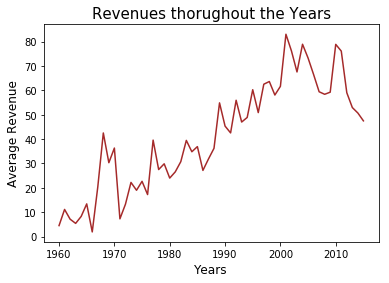

In [22]:
rev = df1.groupby('release_year')['revenue'].mean()
plt.plot(rev , color='brown')
plt.title('Revenues thorughout the Years', size=15);
plt.xlabel('Years', size=12)
plt.ylabel('Average Revenue', size=12);
rev



#### Conclusion:

* Average revenue throughout the years increased from 4.5 million in 1960 to 47.5 million in 2015


### Have Movie length decreased or increased throughout the years?

release_year
1960    110.656250
1961    119.866667
1962    125.833333
1963    111.323529
1964    111.195122
1965    119.294118
1966    108.590909
1967    109.416667
1968    110.540541
1969    110.310345
1970    113.075000
1971    107.727273
1972    103.027027
1973    103.527273
1974    108.659091
1975    107.714286
1976    109.956522
1977    108.327273
1978    111.573770
1979    112.625000
1980    108.424658
1981    105.064103
1982    104.037500
1983    104.389610
1984    104.868687
1985    109.433962
1986    102.165138
1987    102.318584
1988    104.037879
1989    106.250000
1990    105.880952
1991    105.768000
1992    108.182540
1993    107.744186
1994    107.850575
1995    108.335294
1996    106.336735
1997    107.594444
1998    104.774869
1999    107.650943
2000    104.750000
2001    108.990566
2002    106.518672
2003    100.818898
2004    103.632411
2005    104.470588
2006    101.937143
2007    101.028278
2008    100.430839
2009     98.810127
2010     99.695238
2011     98.442982

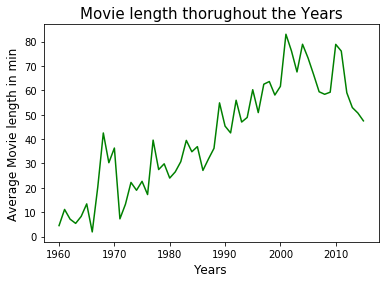

In [23]:
mov_len = df1.groupby('release_year')['runtime'].mean()
plt.plot(rev , color='green')
plt.title('Movie length thorughout the Years', size=15);
plt.xlabel('Years', size=12)
plt.ylabel('Average Movie length in min', size=12);
mov_len

#### Conclusion:

* Average movie length throughout the years decreased from 110 min in 1960 to 97 min in 2015

### Top 10 popular Movies

In [24]:
df1[['popularity', 'original_title']].sort_values(by='popularity', ascending=False).head(10)



,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


### Top 10 profitable Movies

In [25]:
df1[['profit', 'original_title']].sort_values(by='profit', ascending=False).head(10)

,profit,original_title
5919,996,Chce siÄ™ Å¼yÄ‡
6948,992,Special
851,990,Honeymoon
1069,986,My Old Lady
909,985,The Disappearance of Eleanor Rigby: Them
7847,984,The Concorde... Airport '79
8057,980,BMX Bandits
9864,980,What Ever Happened to Baby Jane?
870,973,Tusk
10019,965,Jacob's Ladder


###  Which Actors contributed to the most Movies?

In [26]:
df1['cast'].value_counts().head(15)

Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Tom Hanks                37
Johnny Depp              37
Sylvester Stallone       36
Jean-Claude Van Damme    33
Denzel Washington        33
Robin Williams           33
John Travolta            33
Tom Cruise               31
Steve Martin             30
Harrison Ford            30
John Cusack              29
Name: cast, dtype: int64

###  Which Directors  contributed to the most Movies?

In [27]:
df1['director'].value_counts().head(15)

Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Barry Levinson       19
John Carpenter       18
Tim Burton           18
Mike Nichols         18
David Cronenberg     18
Name: director, dtype: int64

###  Which Production company gained the most profits?

In [28]:
df1[['profit', 'production_companies']].sort_values(by='profit', ascending=False).head(10)

,profit,production_companies
5919,996,MFA Filmdistribution
6948,992,Rival Pictures
851,990,Fewlas Entertainment
1069,986,BBC Films
909,985,Myriad Pictures
7847,984,Universal Pictures
8057,980,Nilsen Premiere
9864,980,Seven Arts Productions
870,973,Phase 4 Films
10019,965,TriStar Pictures


### Which Production company produced the most Movies?

In [29]:
df1['production_companies'].value_counts().head(15)

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
New Line Cinema                           206
Warner Bros.                              172
Miramax Films                             132
TriStar Pictures                          121
Columbia Pictures Corporation             119
Metro-Goldwyn-Mayer (MGM)                 104
20th Century Fox                           88
Village Roadshow Pictures                  79
DreamWorks SKG                             73
United Artists                             73
Name: production_companies, dtype: int64

<a id='conclusions'></a>
## Conclusions

> * Drama, Comedy & Action genres are representing 60% from all movies from 1960 to 2015
> * Strong positive correlation between revenue & profit.
> * Weak positive correlation between budget & revenue.
> * Average revenue has increased throughout the years (1960 - 2015).
> * Average movie length has decreased throughout the years (1960 - 2015).









<a id='conclusions'></a>
#### Limitations

> * Some columns needed much time to modify by splitting such as cast, production companies & director. I had to get a copy of the data when splitting.
> * popularity is a subjective value because it was collected from users on different websites. also, votes collected in the same way. 
this may lead to less accurate results.
> 


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0